In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

cwd = os.getcwd()

cpi_input = pd.read_excel(cwd + '/CPI_Group.xlsx', sheet_name='Data1')
wpi_input = pd.read_excel(cwd + '/WPI_Aggregate.xlsx', sheet_name='Data1')

In [2]:
cpiBygroup = cpi_input.iloc[9:,0:13].dropna()
cpiBygroup.columns = ['Period','Food and beverages', 'Alcohol and tobacco', 'Clothing and footwear','Housing','Furnishings, household equipment and services',
                    'Health','Transport','Communication','Recreation & culture','Education','Financial services and insurance','All group']
cpiBygroup['Period'] = pd.to_datetime(cpiBygroup['Period'])

wpi = wpi_input.iloc[9:,[0,3]].dropna().copy()
wpi.columns = ['Period','WPI']
wpi['Period'] = pd.to_datetime(wpi['Period'])


In [3]:
refPeriod = pd.to_datetime('2019-01-01')

cpiBygroup['Period'] >= refPeriod
cpiBygroup_adjusted = cpiBygroup.loc[cpiBygroup['Period'] >= refPeriod].copy()
for col in cpiBygroup_adjusted.columns[1:]:
    cpiBygroup_adjusted[col] = cpiBygroup_adjusted[col] / cpiBygroup_adjusted[col].iloc[0] * 100

wpi_adjusted = wpi.loc[wpi['Period'] >= refPeriod].copy()
wpi_adjusted['WPI'] = wpi_adjusted['WPI'] / wpi_adjusted['WPI'].iloc[0] * 100

cpiBygroup_adjusted['WPI'] = wpi_adjusted['WPI'].values

In [4]:
cpiBygroup_adjusted[['All group', 'WPI']]

,All group,WPI
291,100.0,100.0
292,100.613497,100.457317
293,101.139351,101.295732
294,101.840491,101.753049
295,102.19106,102.210366
296,100.262927,102.210366
297,101.840491,102.667683
298,102.716915,103.20122
299,103.330412,103.734756
300,104.119194,104.039634


<Axes: xlabel='Period'>

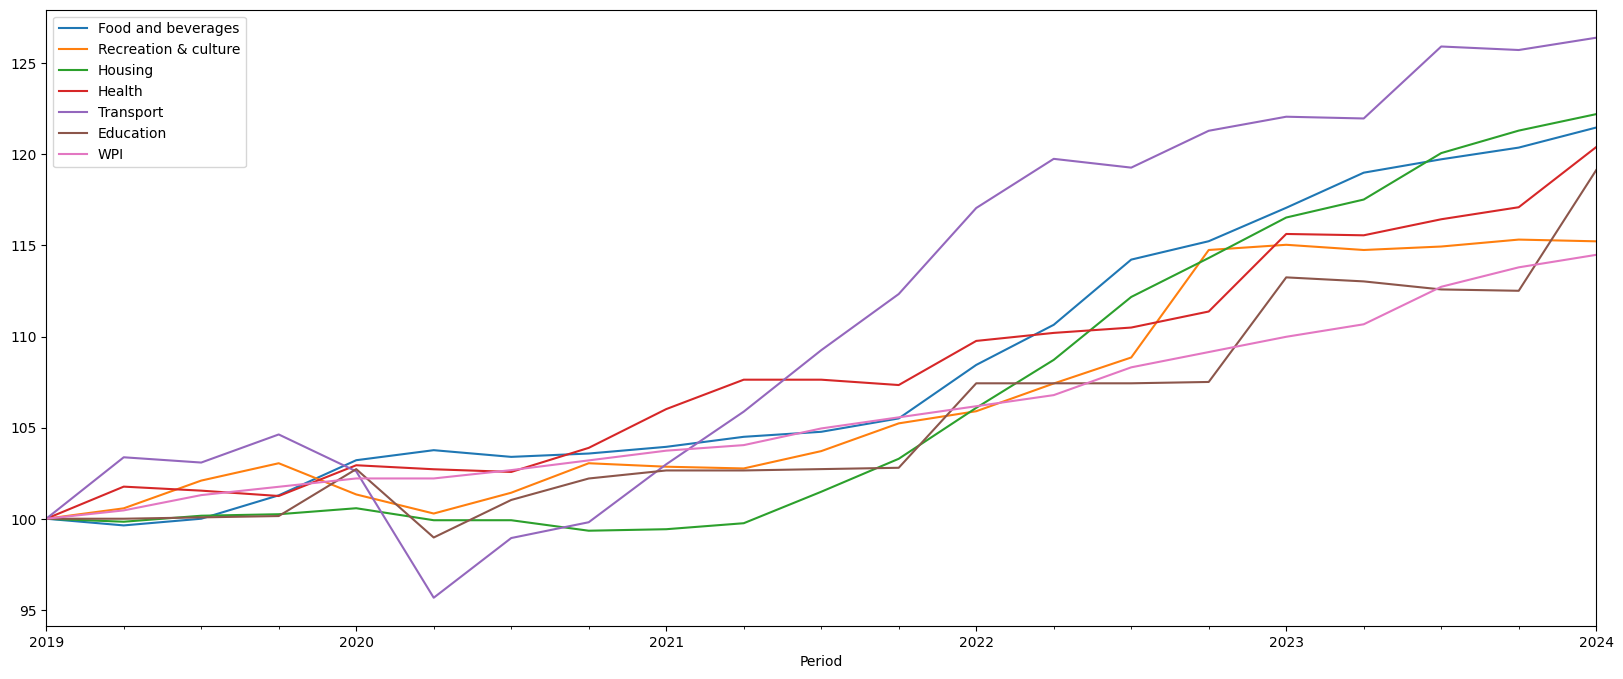

In [5]:
selectedGroup = [
    'Food and beverages', 
    'Recreation & culture',
    'Housing', 
    'Health', 
    'Transport', 
    'Education',
    'WPI']

cpiBygroup_adjusted.plot(x='Period', y=selectedGroup, kind='line', figsize=(20, 8))

In [6]:
# Exporting the data
cpiBygroup_adjusted.to_csv(r'cpiBygroup.csv', index = False)

In [7]:
from bs4 import BeautifulSoup
import requests

url = "https://www.numbeo.com/cost-of-living/region_rankings.jsp?title=2024&region=009"
respone = requests.get(url)
soup = BeautifulSoup(respone.content, 'html.parser')

In [8]:
table = soup.find('table', id='t2')
if table:
    headers = [header.get_text(strip=True) for header in table.find_all('th')]

    rows = []
    for row in table.find_all('tr')[1:]:
        cells = row.find_all('td')
        if len(cells) > 0:
            row_data = [cell.get_text(strip=True) for cell in cells]
            rows.append(row_data)

    df = pd.DataFrame(rows, columns=headers)
    cli = df.iloc[:,1:]
cli['City'] = ["Canberra",
			"Adelaide",
			"Sydney",
			"Perth",
			"Wellington",
			"Auckland",
			"Brisbane",
			"Melbourne",
			"Christchurch",]
        

/var/folders/m5/2zm1zfkj0f34zf9y6m_q_6yw0000gn/T/ipykernel_12626/733930231.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cli['City'] = ["Canberra",


In [9]:
cli.melt(id_vars='City', value_vars=cli.columns[1:], var_name='Category', value_name='Index')
cli.to_csv(r'cliIndex.csv', index = False)

In [10]:
cli_ranked = cli.copy()
cli_ranked.iloc[:,1:] = cli_ranked.iloc[:,1:].rank(ascending=False).astype(int).copy()
cli_ranked
cli_ranked.melt(id_vars='City', value_vars=cli.columns[1:], var_name='Category', value_name='Index')
cli_ranked.to_csv(r'cliRanking.csv', index = False)

In [11]:
cli_ranked

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Canberra,1,2,2,1,9,7
1,Adelaide,2,8,3,2,1,5
2,Sydney,3,1,1,4,5,4
3,Perth,4,6,4,3,2,1
4,Wellington,5,4,5,5,7,6
5,Auckland,6,5,6,6,6,3
6,Brisbane,7,7,8,8,3,2
7,Melbourne,8,3,7,9,4,9
8,Christchurch,9,9,9,7,8,8
